#Exemplo Q-Learning dado em Aula

Aqui abaixo segue a imagem do MDP dado em aula

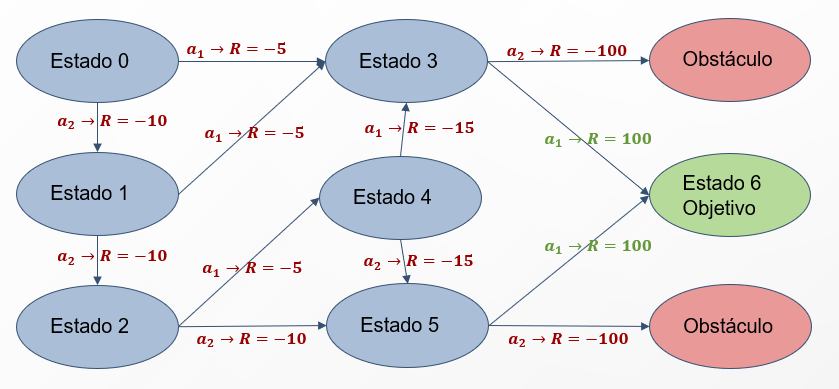

#Algoritmo Q-Learning

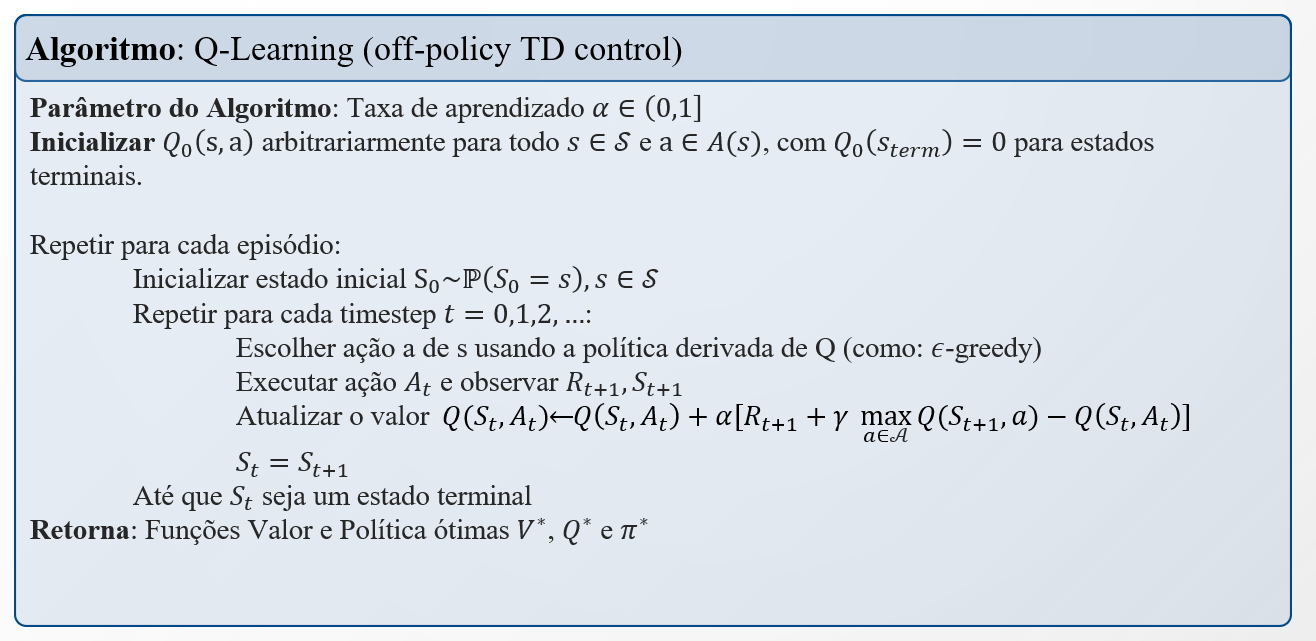

## Imports

In [1]:
import random
import numpy as np

##Environment

In [2]:
class exemplo_aula_env():

    # Função que inicializa o environment
    def __init__(self):
        self.States = ['Estado 0', 'Estado 1', 'Estado 2', 'Estado 3', 'Estado 4', 'Estado 5', 'Estado 6', 'Obstaculo']
        self.Rewards = [[-5,-10],
                        [-5,-10],
                        [-5,-10],
                        [100,-100],
                        [-15,-15],
                        [100,-100]]
        self.action_space = ['a1', 'a2']
        self.state = 'Estado 0'

    
    # Função que calcula se o estado é terminal
    def isTerminal(self):
        if self.state == 'Estado 6' or self.state == 'Obstaculo':
            return (True)
        else:
            return(False)
        

    # Função Step que calcula o reward para cada par estado ação e passa para o próximo estado  
    def step(self, action):
        if self.state == 'Estado 0' and action == 'a1':
            reward = self.Rewards[0][0]
            self.state = 'Estado 3'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 0' and action == 'a2':
            reward = self.Rewards[0][1]
            self.state = 'Estado 1'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 1' and action == 'a1':
            reward = self.Rewards[1][0]
            self.state = 'Estado 3'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 1' and action == 'a2':
            reward = self.Rewards[1][1]
            self.state = 'Estado 2'
            return (self.state, reward, self.isTerminal())
                    
        if self.state == 'Estado 2' and action == 'a1':
            reward = self.Rewards[2][0]
            self.state = 'Estado 4'
            return (self.state, reward, self.isTerminal())
                    
        if self.state == 'Estado 2' and action == 'a2':
            reward = self.Rewards[2][1]
            self.state = 'Estado 5'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 3' and action == 'a1':
            reward = self.Rewards[3][0]
            self.state = 'Estado 6'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 3' and action == 'a2':
            reward = self.Rewards[3][1]
            self.state = 'Obstaculo'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 4' and action == 'a1':
            reward = self.Rewards[4][0]
            self.state = 'Estado 3'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 4' and action == 'a2':
            reward = self.Rewards[4][1]
            self.state = 'Estado 5'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 5' and action == 'a1':
            reward = self.Rewards[5][0]
            self.state = 'Estado 6'
            return (self.state, reward, self.isTerminal())
            
        if self.state == 'Estado 5' and action == 'a2':
            reward = self.Rewards[5][1]
            self.state = 'Obstaculo'
            return (self.state, reward, self.isTerminal())
            


    # Função reset que devolve para o estado inicial
    def reset(self):
        self.state = 'Estado 0'
        return (self.state)

## Agente Q-Learning

In [3]:
class Agent():
    def __init__(self, env, epsilon=0.9, alpha=0.3, gamma=0.9):
        self.env = env

        # Looks like n is number of valid actions from the souce code
        self.valid_actions = env.action_space

        # Set parameters of the learning agent
        self.Q = {'Estado 0':{'a1':0.0,'a2':0.0},
                  'Estado 1':{'a1':0.0,'a2':0.0},
                  'Estado 2':{'a1':0.0,'a2':0.0},
                  'Estado 3':{'a1':0.0,'a2':0.0},
                  'Estado 4':{'a1':0.0,'a2':0.0},
                  'Estado 5':{'a1':0.0,'a2':0.0},
                  'Estado 6':{'a1':0.0,'a2':0.0},
                  'Obstaculo':{'a1':0.0,'a2':0.0}}          # Q-table 
        self.epsilon = epsilon   # Random exploration rate
        self.alpha = alpha       # Learning rate
        self.gamma = gamma       # Discount rate- closer to 1 learns well into distant future




    def get_maxQ(self, observation):
        """
        Called when the agent is asked to find the maximum Q-value of
        all actions based on the 'observation' the environment is in.
        """
        return max(self.Q[observation].values())

    def choose_action(self, observation):
        """
        Choose which action to take, based on the observation.
        If observation is seen for the first time, initialize its Q values to 0.0
        """

        # uniformly distributed random number > epsilon happens with probability 1-epsilon
        if random.random() > self.epsilon:
            maxQ = self.get_maxQ(observation)

            # multiple actions could have maxQ- pick one at random in that case
            # this is also the case when the Q value for this observation were just set to 0.0
            action = random.choice([k for k in self.Q[observation].keys()
                                    if self.Q[observation][k] == maxQ])
        else:
            action = random.choice(self.valid_actions)

        return action



    def learn(self, observation, action, reward, next_observation, is_terminal):
        """
        Called after the agent completes an action and receives a reward.
        This function does not consider future rewards
        when conducting learning.
        """
        self.Q[observation][action] += self.alpha * (reward
                                                  + (self.gamma * self.get_maxQ(next_observation))
                                                  - self.Q[observation][action])



##Loop de Treino

In [4]:
# Iniciando o Environment
env = exemplo_aula_env()

# Iniciando o Agent
agent = Agent(env=env,epsilon=0.7, alpha=0.2, gamma=0.9)


num_episodes = 100001 # Número máximo de épocas

observation = env.reset()
for episode in range(num_episodes):
    is_terminal = False

    while is_terminal == False:
        # Escolhendo a ação
        action = agent.choose_action(observation)

        # Escolhendo a ação
        (next_observation, reward, is_terminal)  = env.step(action)

        # Aprendendo
        agent.learn(observation, action, reward, next_observation, is_terminal)

        #Incrementando o estado
        observation = next_observation

    #Resetando o environment
    observation = env.reset() 
    
    # Fazendo decay dos Hiperparâmetros
    agent.epsilon -= 0.6995/num_episodes
    agent.alpha -= 0.1995/num_episodes
    

    # Apenas um print da tabela Q em algumas épocas específicas    
    if episode in [5, 25, 50, 100, 150, 300, 500, 3000, 100000]:
        Q = np.array([[agent.Q['Estado 0']['a1'], agent.Q['Estado 0']['a2']],
                      [agent.Q['Estado 1']['a1'],agent.Q['Estado 1']['a2']],
                      [agent.Q['Estado 2']['a1'],agent.Q['Estado 2']['a2']],
                      [agent.Q['Estado 3']['a1'],agent.Q['Estado 3']['a2']],
                      [agent.Q['Estado 4']['a1'],agent.Q['Estado 4']['a2']],
                      [agent.Q['Estado 5']['a1'],agent.Q['Estado 5']['a2']]
                      ])
        print('\nÉpoca: ' + str(episode))
        print(Q)


Época: 5
[[ 13.31955313  -3.59987232]
 [  9.62659115  -1.99994015]
 [  0.          -1.99994015]
 [ 59.039285   -19.99900251]
 [  0.           0.        ]
 [ 19.99940151   0.        ]]

Época: 25
[[ 71.34563296  13.20744534]
 [ 53.79804344  -5.05967043]
 [ -0.16188484  -1.99994015]
 [ 95.60016546 -89.25864503]
 [  9.10084249   0.59982046]
 [ 19.99940151 -19.99760602]]

Época: 50
[[ 83.76647139  56.40024772]
 [ 82.41972364  -5.05967043]
 [ -0.16188484  -1.99994015]
 [ 99.87597209 -98.55703936]
 [  9.10084249   0.59982046]
 [ 19.99940151 -19.99760602]]

Época: 100
[[ 84.99767145  66.16944944]
 [ 84.90386033  -7.08184415]
 [  4.18433948   5.17432949]
 [ 99.99987646 -99.95925778]
 [ 32.80467744   4.33948138]
 [ 59.01691138 -19.99760602]]

Época: 150
[[ 84.9999989   66.4646215 ]
 [ 84.99170728  -2.42585723]
 [  4.18433948  27.50023164]
 [ 99.99999996 -99.99648828]
 [ 32.80467744   4.33948138]
 [ 73.75610436 -35.97797482]]

Época: 300
[[ 85.          66.49999507]
 [ 84.99999725  47.12722025]